# Homework 07: The Normal Distribution, The Central Limit Theorem, Confidence Intervals
***

**Name**: Julia Troni

***

This assignment is due on Canvas by **6:00PM on Friday October 28**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available in the Homework 01 assignment write-up on Canvas. To make life easier on the grader if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do $\color{red}{\text{Kernel}}$ $\color{red}\rightarrow$ $\color{red}{\text{Restart & Run All}}$ as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** $\color{red}{\text{write a summary of the results}}$ in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---

For this HW you will want to import a few of the usuals:

In [1]:
# Per the standard import pandas as 'pd' and numpy as 'np'
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 
import scipy.stats as stats
from scipy.stats import norm

# Problem 1
***
We are going to look at some data from an insurance company that insures teenage drivers. `insurance.csv` is a sample of 1000 males and 1000 females all of whose ages are between 16 and 19 inclusive.

This insurance company has decided to use 'sex' as a proxy for deciding how large of a premium to charge for car insurance.

Read in the csv file `insurance.csv`.

### Part A
***(1 point)*** Load the `csv` file into a dataframe and call it `dfInsurance`:

In [2]:
# Read 'insurance' into dfInsurance
# Path to data 
file_path = 'insurance.csv'

# Load the data into a DataFrame 
df_Insurance = pd.read_csv(file_path)


### Part B
***(1 point)*** Take a look at the data.

In [3]:
# Inspect some of the data
df_Insurance.head()

,Sex,miles driven,Age,Citations
0,F,4200.826390,18,0
1,F,5468.727014,17,0
2,F,5282.253745,18,0
3,F,5060.526521,17,0
4,F,5101.878224,16,2


In [4]:
#check data types 
df_Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           2000 non-null   object 
 1   miles driven  2000 non-null   float64
 2   Age           2000 non-null   int64  
 3   Citations     2000 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 62.6+ KB


### Data Description:

This data contains records from a number of teenage drivers. The drivers were observed for 12 months and the number of miles they drove and the number of citations they received were recorded. Citations were for wreckless driving, disobeying traffic laws, speeding, and/or accidents.

$\color{red}{\text{Sex}}$ - This is the sex of the driver.

$\color{red}{\text{miles driven}}$ - This is the number of miles driven during the observation period.

$\color{red}{\text{Age}}$ - This is the age of the driver at the beginning of the observation period.

$\color{red}{\text{Citations}}$ - This is the number of citations received by the driver.


### Part C
***(2 points)*** Which sex has more overall citations?

In [5]:
#df to hold male and females to use for C,D, E, 

dfMale= df_Insurance.loc[df_Insurance['Sex']=='M']
dfFemale= df_Insurance.loc[df_Insurance['Sex']=='F']

In [6]:
#sum number of citations for each sex and print

male_citations = dfMale['Citations'].sum() 
female_citations = dfFemale['Citations'].sum() 
print("Males had {} citations".format(male_citations))
print("Females had {} citations".format(female_citations))
print("Males have overall citations than females in this sample")

Males had 468 citations
Females had 397 citations
Males have overall citations than females in this sample


### Part D
***(2 points)*** Find the mean number of citations received by males and the mean number of citations received by females. Who received more citations in the year?


In [7]:
#use numpy canned mean function to calculate mean of citations for each gender and print


male_mean_citations = dfMale['Citations'].mean() 
female_mean_citations = dfFemale['Citations'].mean()
print("Mean males citations: {}".format(male_mean_citations))
print("Mean females citations: {}".format(female_mean_citations))
print("Males have more citations per year than females for this sample")


Mean males citations: 0.468
Mean females citations: 0.397
Males have more citations per year than females for this sample


### Part E
***(3 points)*** Estimate the difference in population means (for citations received) by creating a 95% CI for the difference between the sample means for number of citations received by males and females.

Recall the equation below from lecture. Perform the proper calculations 'by hand' (i.e. code without a canned function).

$\bar{X}-\bar{Y}\pm Z_{\frac{\alpha}{2}}\cdot\sqrt{\frac{\sigma_1^2}{m}+\frac{\sigma_2^2}{n}}$

In [8]:

#number of each sex in sample
m_n=len(dfMale) 
f_n=len(dfFemale) 


#stdeviation for each sex
m_std= dfMale['Citations'].std()
f_std= dfFemale['Citations'].std()

#mean citations from above
male_mean_citations = dfMale['Citations'].mean() 
female_mean_citations = dfFemale['Citations'].mean()

# holds the critical z.
zalph=stats.norm.ppf(.975) ##alpha/2 so 1-(alpha/2)=1-(0.05/2)=1-0.025=0.975 since 95% confidence interval


#male mean - female mean ± zalpha * (m_std^2/m_n + f_std^2/f_n)^.5

lowbound= (male_mean_citations-female_mean_citations) - zalph*( (m_std**2/m_n + f_std**2/f_n)**.5)
highbound= (male_mean_citations-female_mean_citations) + zalph*( (m_std**2/m_n + f_std**2/f_n)**.5)
print(" 95% CI for difference between the sample means for number of citations received by males and females: ({:.3f}, {:.3f})".
      format(lowbound,highbound))



 95% CI for difference between the sample means for number of citations received by males and females: (0.003, 0.139)


In [9]:
# check with using .interval function
int= stats.norm.interval(.95, loc=male_mean_citations-female_mean_citations, scale=(m_std**2/m_n + f_std**2/f_n)**.5) 
# confidencelevel=.95, loc= xbar, and scale=standard error=sd/np.sqrt(n).

print(" Check using 'interval' function : ({:.3f}, {:.3f})".
      format(lowbound,highbound))

 Check using 'interval' function : (0.003, 0.139)


### Part F
***(1 point)*** Is 0 inside the confidence interval? Describe the meaning of your results.


Solution here:

No. 0 is not inside the confidence interval. We are 95% confident that the true difference in population means for male and female driving citations is between the interval (0.003, 0.139)
This does not include 0, and the whole interval is positive, this indicated that the mean driving citations for the population is greater for males than females 
 

### Part G
***(4 points)*** Compare the number of miles driven per year by each sex. Start by getting a visual representation of the number of miles driven by each sex. Graph both male and female 'miles driven' distributions in the same frame for comparison.


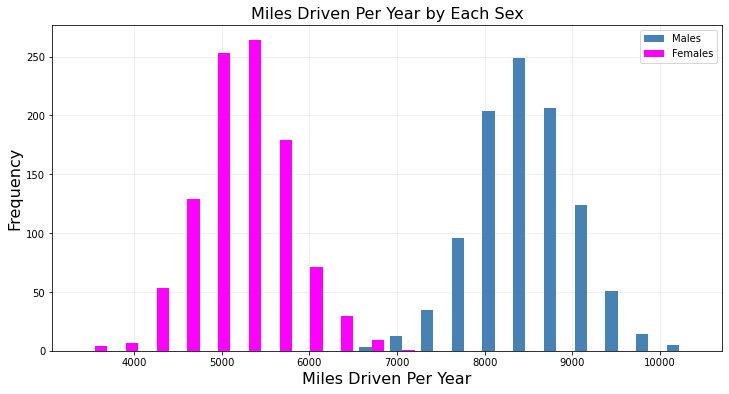

In [10]:
# Initialze the picture
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
mmi = dfMale['miles driven'] 
fmi = dfFemale['miles driven']

# Make a histogram out of 'mmi' (male miles driven) and 'fmi' (female miles driven)
plt.hist([mmi, fmi], bins=20, label=['Males', 'Females'], color=["steelblue", "magenta"])
plt.legend(loc='upper right')

# Make the graph readable
ax.grid(alpha=0.25)

ax.set_axisbelow(True)
ax.set_title("Miles Driven Per Year by Each Sex", fontsize=16)
ax.set_xlabel("Miles Driven Per Year", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16);
plt.show()


### Part H
***(1 point)*** Based on the distributions, who appears to drive more miles in a year? Is there any overlap of histograms? Describe what you have found.

Solution: 

From the graph, we see that males drive considerably more per year than females. There is only a very small overlap of the histograms which occurs between 6500-7500 miles. This is at the very lowest bound of the male distribution and the highest bound of the female distribution, meaning it is very unlikely that the two sexes will drive the same number of miles.
We will also note that both males and females miles driven follows a normal distribution. 

### Part I
***(2 points)*** What is the difference in mean miles driven by the two groups (male and female)?

In [11]:
# Code solution here:
# E[𝑋¯−𝑌¯]=E[𝑋¯]−[𝑌¯]= 

#use numpy canned mean function to calculate total miles driven by each gender and print
male_mean_milesdriven = dfMale['miles driven'].mean() 
female_mean_milesdriven = dfFemale['miles driven'].mean()
print("Males mean miles driven: {}".format(male_mean_milesdriven))
print("Females mean miles driven: {}".format(female_mean_milesdriven))
print("Males drove on average {:.2f} more miles than the average driven by females in this sample"
      .format( male_mean_milesdriven-female_mean_milesdriven))

Males mean miles driven: 8508.07537070199
Females mean miles driven: 5216.558464690003
Males drove on average 3291.52 more miles than the average driven by females in this sample


### Part J
***(3 points)*** Estimate the difference in population means (for miles driven) by creating a 95% CI for the difference between the sample means for 'miles driven' by males and females.

Recall the equation below from lecture. Perform the proper calculations 'by hand' (i.e. code without a canned function).

$\bar{X}-\bar{Y}\pm Z_{\frac{\alpha}{2}}\cdot\sqrt{\frac{\sigma_1^2}{m}+\frac{\sigma_2^2}{n}}$

Create a 95% CI for the difference in miles driven per year.

In [12]:

#number of each sex in sample
m_n=len(dfMale) 
f_n=len(dfFemale) 


#stdeviation for each sex
m_std= dfMale['miles driven'].std()
f_std= dfFemale['miles driven'].std()

#mean miles driven from above
male_mean_milesdriven = dfMale['miles driven'].mean() 
female_mean_milesdriven = dfFemale['miles driven'].mean()

# holds the critical z.
zalph=stats.norm.ppf(.975) ##alpha/2 so 1-(alpha/2)=1-(0.05/2)=1-0.025=0.975 since 95% confidence interval


#male mean - female mean ± zalpha * (m_std^2/m_n + f_std^2/f_n)^.5

lowbound= (male_mean_milesdriven-female_mean_milesdriven) - zalph*( (m_std**2/m_n + f_std**2/f_n)**.5)
highbound= (male_mean_milesdriven-female_mean_milesdriven) + zalph*( (m_std**2/m_n + f_std**2/f_n)**.5)


print(" 95% CI for difference between the mean miles driven by males and females: ({:.3f}, {:.3f})".
      format(lowbound,highbound))



 95% CI for difference between the mean miles driven by males and females: (3243.609, 3339.424)


In [13]:
# check with using .interval function
stats.norm.interval(.95, loc=male_mean_milesdriven-female_mean_milesdriven, scale=(m_std**2/m_n + f_std**2/f_n)**.5) 
# confidencelevel=.95, loc= xbar, and scale=standard error=sd/np.sqrt(n).


print(" Check using 'interval' function : ({:.3f}, {:.3f})".
      format(lowbound,highbound))

 Check using 'interval' function : (3243.609, 3339.424)


### Part K
***(1 points)*** Is 0 in the interval? Describe your findings.

Solution:

No. 0 is not inside the confidence interval. We are 95% confident that the true difference in population means for miles driven by males and females is between the interval (3243.609, 3339.424)
Since this does not include 0, and the whole interval is positive, this indicateas that the mean miles driven for the population is greater for males than females 
 

### Part L
***(4 points)*** Create a column called 'CPM'(this acronym stands for citations per 1000 miles), and put in it the number of citations divided by the number of miles driven (multiplied by 1000). The multiplication by 1000 ensures we are looking at citations per 1000 miles. This is done because the numbers are so small.

After you create the 'CPM' column look at the tail of the dataframe.

In [14]:
# Code your solution here:
df_Insurance['CPM']= df_Insurance['Citations']/df_Insurance['miles driven']*1000

df_Insurance.tail()

,Sex,miles driven,Age,Citations,CPM
1995,M,8433.768080,17,1,0.118571
1996,M,8047.929523,18,1,0.124256
1997,M,7285.647012,18,1,0.137256
1998,M,8579.702457,18,0,0.000000
1999,M,7868.067827,16,0,0.000000


### Part M
***(2 points)*** Look at the difference in means for male CPM and female CPM. Which sex receive more citations per 1000 miles?

In [15]:
#recreate the df to hold male and females since now we added a coloumn to df_Insurance 
dfMale= df_Insurance.loc[df_Insurance['Sex']=='M']
dfFemale= df_Insurance.loc[df_Insurance['Sex']=='F']


#use numpy canned mean function to calculate mean citations per 1000 miles by each gender and print
male_mean_CPM = dfMale['CPM'].mean() 
female_mean_CPM = dfFemale['CPM'].mean()
print("Males mean citations per 1000 miles: {:.3f}".format(male_mean_CPM))
print("Females mean citations per 1000 miles: {:.3f}".format(female_mean_CPM))
print("Females recieve on average {:.3f} more citations per 1000 miles than males".
      format( female_mean_CPM-male_mean_CPM))

Males mean citations per 1000 miles: 0.055
Females mean citations per 1000 miles: 0.077
Females recieve on average 0.022 more citations per 1000 miles than males


### Part N
***(1 point)*** You should have discovered that females get more citations per mile than do males. How does this go together with the fact that males get more citations in a year?

Solution:


This makes sense becasue, while males get more citations in a year, they also drive CONSIDERABLY more miles than females. 
So, since males get only slightly more total citations, but drive considerably more miles, we are dividing by a significantly larger number of miles and hence the females recieve more citations per 1000 miles since they drive significantly fewer miles.

### Part O
***(3 points)*** Estimate the difference in population means (for CPM's) by creating a 95% CI for the difference between the sample means for 'CPM' for males and females.

Recall the equation below from lecture. Perform the proper calculations 'by hand' (i.e. code without a canned function).

$\bar{X}-\bar{Y}\pm Z_{\frac{\alpha}{2}}\cdot\sqrt{\frac{\sigma_1^2}{m}+\frac{\sigma_2^2}{n}}$

Create a 95% CI for the difference in miles driven per year.


In [16]:
# Code solution here:

#number of each sex in sample
m_n=len(dfMale) 
f_n=len(dfFemale) 


#stdeviation for each sex
m_std= dfMale['CPM'].std()
f_std= dfFemale['CPM'].std()

#mean miles driven from above
male_mean_CPM = dfMale['CPM'].mean() 
female_mean_CPM = dfFemale['CPM'].mean()

# holds the critical z.
zalph=stats.norm.ppf(.975) ##alpha/2 so 1-(alpha/2)=1-(0.05/2)=1-0.025=0.975 since 95% confidence interval


#male mean - female mean ± zalpha * (m_std^2/m_n + f_std^2/f_n)^.5

lowbound= ((male_mean_CPM-female_mean_CPM) ) - ( zalph*( (m_std**2/m_n + f_std**2/f_n)**.5) )
highbound= ((male_mean_CPM-female_mean_CPM) ) + (zalph*( (m_std**2/m_n + f_std**2/f_n)**.5) )



print(" 95% CI for the average difference in citations per 1000 miles between males and females: ({:.3f}, {:.3f})".
      format(lowbound,highbound))

 95% CI for the average difference in citations per 1000 miles between males and females: (-0.032, -0.011)


### Part P
***(1 point)*** Does your result contain 0? Describe your findings.

Solution:

No. 0 is not inside the confidence interval. We are 95% confident that the true difference in population means for male and female citations per 1000 miles is between the interval (-0.032, -0.011)
This does not include 0, and the whole interval is negative, this indicates that the average citations per 1000 miles is greater for females than males 
 

### Part Q
***(1 point)*** Can you explain why males pay higher insurance premiums when they receive fewer citations per mile? Hint: is insurance typically sold by the mile or by the year?

Solution:


### Part R
***(2 points)*** Consider the graphic below. It is merely a cut-and-past .png, it isn't live code.

Look at the code and the graphic and describe what story it tells.

![title](code.png)
![title](graph.png)

In [17]:
# The graphic above was created with this code.
# Of course this code will likely not work in your notebook since
# you have different variable names. This is why it is commented out.

#mCPM = dfInsurance.loc[dfInsurance['Sex']=='M', 'CPM'].values
#fCPM = dfInsurance.loc[dfInsurance['Sex']=='F', 'CPM'].values

#bins = np.linspace(0.001, 0.6, 8)
#plt.hist([mCPM, fCPM], bins, label=['male', 'female'])
#plt.legend(loc='upper right')
#plt.show()

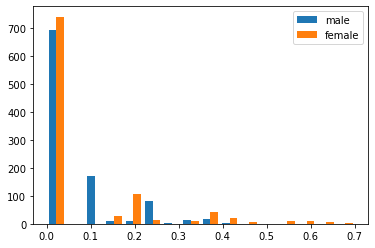

In [18]:
mCPM = df_Insurance.loc[df_Insurance['Sex']=='M', 'CPM'].values
fCPM = df_Insurance.loc[df_Insurance['Sex']=='F', 'CPM'].values

bins = np.linspace(0, .7, 17)
plt.hist([mCPM, fCPM], label=['male', 'female'], bins=bins)
plt.legend(loc='upper right')
plt.show()


Solution:

The code above graphs the frequency distribution of CPM for males and females on the same plot. Note that the graph only includes the values between 0.001 and 0.6. 

We see that the distribution for males is right skewed and the mean appears to be lower for males than females. Also note that the mode for both males and females (excluding 0) is 0.1 citations per 1000 miles. Also, the variance (and hence standard deviation) is larger for females. 


### Part S
***(5 points)*** In part G you noticed that the miles driven per year for females or males both followed approximately normal distributions.  Assuming we model miles driven per year with normal distribution(s) with mean(s) and standard deviation(s) equal to the sample mean(s) and sample std deviation(s) for each gender found above, what percent of males drive between 6400 and 8400 miles per year?
What percent of females drive that same amount?


In [19]:
# Code your solution here:

#stdeviation for males
m_std= dfMale['miles driven'].std()
#mean miles driven for males
m_mean_milesdriven = dfMale['miles driven'].mean() 

#stdeviation for females
f_std= dfFemale['miles driven'].std()
#mean miles driven for females
f_mean_milesdriven = dfFemale['miles driven'].mean() 

#P(6400 ≤ X ≤ 8400)
#for males
m_zl=(6400-m_mean_milesdriven)/m_std #Z=(X-𝜇)/𝜎
m_zh=(8400-m_mean_milesdriven)/m_std #Z=(X-𝜇)/𝜎

#for females
f_zl=(6400-f_mean_milesdriven)/f_std #Z=(X-𝜇)/𝜎
f_zh=(8400-f_mean_milesdriven)/f_std #Z=(X-𝜇)/𝜎

#P(zl ≤ Z ≤ zh)=P(Z ≤ zh)-P(Z>zl)= P(Z ≤ zh)- (1-P(Z ≤ zl))
malesPercent= stats.norm.cdf(m_zh)-stats.norm.cdf(m_zl)
femalesPercent= stats.norm.cdf(f_zh)-stats.norm.cdf(f_zl)

print("{:.2f}% of females and {:.2f}% of males drive between 6400 and 8400 miles per year".
      format(femalesPercent*100, malesPercent*100))

1.14% of females and 42.50% of males drive between 6400 and 8400 miles per year


### Part T
***(4 points)*** 95% of females drive less than x miles. What is x?  (Again, assume miles driven by females follows a normal distribution with mean and standard deviation equal to the sample mean and sample std deviation found above)

In [20]:
#get z score of normal distribution for alpha=0.95
z=stats.norm.ppf(0.95) 
 #convert z score to x value using #Z=(X-𝜇)/𝜎
xval= (z*f_std)+f_mean_milesdriven

print("95% of females drive less than {:.3f} miles".format(xval))

95% of females drive less than 6071.695 miles


# Problem 2
***

Let $X$ be a normal random variable, $X \sim N(\mu, \sigma^2) = N(5,9)$.

Let $Z$ be a $\color{red}{\text{standard}}$ normal random variable, $Z \sim N(\mu, \sigma^2) = N(0,1)$.


### Part A

***(2 points)*** Compute $P(X \leq 8.75)$.

In [21]:
#transform to standard normal distribution using Z=(X-𝜇)/𝜎
z=(8.75-5)/3 #Z=(X-𝜇)/𝜎

#so now we have P(Z≤1.25)=?
#use stats.norm.cdf which automatically calculates left tail 
valA= stats.norm.cdf(z)

#check with chart which does right tail P(Z>a)
#so P(Z≤1.25)=1-P(Z>1.25)=1-0.1056


print("𝑃(𝑋≤8.75)= {:.3f}%".format(valA*100))

𝑃(𝑋≤8.75)= 89.435%


### Part B

***(2 points)*** Compute $P(Z\leq 1.25)$.

In [22]:
#we already have a standard normal distibution so simply use cdf to get area under 

# use stats.norm.cdf which automatically calculates left tail 
Bval=stats.norm.cdf(1.25)


print("𝑃(Z≤1.25)= {:.3f}%".format(Bval*100))

𝑃(Z≤1.25)= 89.435%


### Part C

***(2 points)*** Explain why the answer to these first two questions are the same.

Solution:

These answers are the same becasue we can standardize any normal distribution using the Z score, which is what I did in Part A. Thus since the Z score's for part A and part B were both 1.25, the answers were the same. 